In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from numpy import quantile, where, random
import matplotlib.pyplot as plt
import seaborn as sb



## Etapa 1 - Carregar DataSet

In [2]:
df = pd.read_csv("crx.csv", na_values="?")

df.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,CLASSE
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,pos
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,pos
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,pos
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,pos
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,pos


In [3]:
print(df)

    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15  \
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0   
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560   
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824   
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3   
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0   
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...   
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0   
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394   
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1   
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750   
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0   

    CLASSE  
0      pos  
1      pos  
2      pos  
3      pos  
4      pos

## Etapa 2 e 3 - Analise do Dataset

In [4]:
print("Numero de instancias: ", df.shape[0])
print("Numero de atributos: ", df.shape[1])

# Para verificação dos atributos qualitativos e quantitativos
df.dtypes

Numero de instancias:  690
Numero de atributos:  16


A1         object
A2        float64
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14       float64
A15         int64
CLASSE     object
dtype: object

## Etapa 4 - Quais os valores distintos de cada atributo Qualitativo/Categórico?

In [5]:
keys = df.keys()
num_keys = ["A2", "A3","A8",  "A11", "A14", "A15"]

for key in keys:
    if key not in num_keys:
        print(df[key].value_counts())



b    468
a    210
Name: A1, dtype: int64
u    519
y    163
l      2
Name: A4, dtype: int64
g     519
p     163
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64
t    361
f    329
Name: A9, dtype: int64
f    395
t    295
Name: A10, dtype: int64
f    374
t    316
Name: A12, dtype: int64
g    625
s     57
p      8
Name: A13, dtype: int64
neg    383
pos    307
Name: CLASSE, dtype: int64


## Etapa 5 - Media dos atributos quantitativos

In [6]:
df.mean()

A2       31.568171
A3        4.758725
A8        2.223406
A11       2.400000
A14     184.014771
A15    1017.385507
dtype: float64

## Etapa 6 - Quais colunas possuem valores ausentes e quanto

In [7]:
for col in df.columns[:-1]:
    print('\t%s: %d' % (col,df[col].isnull().sum()) )

	A1: 12
	A2: 12
	A3: 0
	A4: 6
	A5: 6
	A6: 9
	A7: 9
	A8: 0
	A9: 0
	A10: 0
	A11: 0
	A12: 0
	A13: 0
	A14: 13
	A15: 0


## Etapa 7 - Quais instancias possuem valores ausentes

In [8]:
df_null = df[df.isnull().any(axis=1)]
# Indices com valores ausentes
print(df_null.index)
    

Int64Index([ 71,  83,  86,  92,  97, 202, 206, 243, 248, 254, 270, 278, 286,
            327, 329, 330, 346, 374, 406, 445, 450, 453, 456, 479, 489, 500,
            515, 520, 539, 592, 598, 601, 608, 622, 626, 641, 673],
           dtype='int64')


## Etapa 8 - Remover instancias que possuem mais de um valor ausente

In [9]:
# Tamanho antes de remover ausentes
print(df.shape)

df = df.dropna(thresh=14) # Threshold 14 para remover apenas das que possuem mais de 1 valor ausente
df = df.reset_index(drop=True)

# Tamanho apos de remover ausentes
print(df.shape)

(690, 16)
(682, 16)


## Etapa 9 - Imputacao de dados de acordo com atributo faltante

In [10]:
# print para verificar a imputação dos valores nas colunas quantitativas-> Verificar instancia 327 coluna A2
# print(df[325:350])

# Fizemos um dicionario de chave e valor com as medias de cada coluna quantitativa, provavelmente tem outras formais mais elegantes de fazer isso, mas conseguimos fazer dessa forma
values = {"A2": df["A2"].mean(), "A3" : df["A3"].mean(),"A8" : df["A8"].mean(),  "A11" : df["A11"].mean(), "A14": df["A14"].mean(), "A15": df["A15"].mean()}
df = df.fillna(value=values)

print(df[325:350])


      A1         A2      A3 A4 A5  A6  A7     A8 A9 A10  A11 A12 A13     A14  \
325  NaN  40.830000   3.500  u  g   i  bb  0.500  f   f    0   f   s  1160.0   
326    b  34.830000   2.500  y  p   w   v  3.000  f   f    0   f   s   200.0   
327    b  31.524716   4.000  y  p   i   v  0.085  f   f    0   t   g   411.0   
328    a  33.250000   2.500  y  p   c   v  2.500  f   f    0   t   g     0.0   
329    b  34.080000   2.500  u  g   c   v  1.000  f   f    0   f   g   460.0   
330    a  25.250000  12.500  u  g   d   v  1.000  f   f    0   t   g   180.0   
331    b  34.750000   2.500  u  g  cc  bb  0.500  f   f    0   f   g   348.0   
332    b  27.670000   0.750  u  g   q   h  0.165  f   f    0   t   g   220.0   
333    b  47.330000   6.500  u  g   c   v  1.000  f   f    0   t   g     0.0   
334    a  34.830000   1.250  y  p   i   h  0.500  f   f    0   t   g   160.0   
335    a  33.250000   3.000  y  p  aa   v  2.000  f   f    0   f   g   180.0   
336    b  28.000000   3.000  u  g   w   

In [11]:
# Variavel para guardar o set inicial de colunas categoricas
cat_keys = []

for key in keys:
    if key not in num_keys:
        cat_keys.append(key)

# print para verificar a imputação dos valores nas colunas categorias-> Verificar instancia 325 coluna A1
# print(df[325:350])

# Após fazer imputação das colunas quantitativas, usamos SimpleImputer para as colunas categoricas
column_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
column_mean = column_mean.fit(df[cat_keys])
df[cat_keys] = column_mean.transform(df[cat_keys])

print(df[325:350])


    A1         A2      A3 A4 A5  A6  A7     A8 A9 A10  A11 A12 A13     A14  \
325  b  40.830000   3.500  u  g   i  bb  0.500  f   f    0   f   s  1160.0   
326  b  34.830000   2.500  y  p   w   v  3.000  f   f    0   f   s   200.0   
327  b  31.524716   4.000  y  p   i   v  0.085  f   f    0   t   g   411.0   
328  a  33.250000   2.500  y  p   c   v  2.500  f   f    0   t   g     0.0   
329  b  34.080000   2.500  u  g   c   v  1.000  f   f    0   f   g   460.0   
330  a  25.250000  12.500  u  g   d   v  1.000  f   f    0   t   g   180.0   
331  b  34.750000   2.500  u  g  cc  bb  0.500  f   f    0   f   g   348.0   
332  b  27.670000   0.750  u  g   q   h  0.165  f   f    0   t   g   220.0   
333  b  47.330000   6.500  u  g   c   v  1.000  f   f    0   t   g     0.0   
334  a  34.830000   1.250  y  p   i   h  0.500  f   f    0   t   g   160.0   
335  a  33.250000   3.000  y  p  aa   v  2.000  f   f    0   f   g   180.0   
336  b  28.000000   3.000  u  g   w   v  0.750  f   f    0   t  

In [12]:
df.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.207737,0.400398,0.189637,-0.078157,0.019454
A3,0.207737,1.000000,0.294387,0.267881,-0.223941,0.121751
A8,0.400398,0.294387,1.000000,0.319775,-0.077369,0.049968
A11,0.189637,0.267881,0.319775,1.000000,-0.120599,0.062664
A14,-0.078157,-0.223941,-0.077369,-0.120599,1.000000,0.065422
A15,0.019454,0.121751,0.049968,0.062664,0.065422,1.000000


## Etapa 10 Remover atributos com 3 ou mais valores distintos

In [13]:
removed_keys = []

# Verificação das colunas a serem removidas
for key in keys:
    if key not in num_keys:
        if(df[key].value_counts().count() >= 3):
            removed_keys.append(key)

print(removed_keys)

df = df.drop(axis='columns', columns=removed_keys)

df.head()

['A4', 'A5', 'A6', 'A7', 'A13']


,A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,CLASSE
0,b,30.83,0.000,1.25,t,t,1,f,202.0,0,pos
1,a,58.67,4.460,3.04,t,t,6,f,43.0,560,pos
2,a,24.50,0.500,1.50,t,f,0,f,280.0,824,pos
3,b,27.83,1.540,3.75,t,t,5,t,100.0,3,pos
4,b,20.17,5.625,1.71,t,f,0,f,120.0,0,pos


## Etapa 11 Aplicação One Hot Encoder

In [14]:
keys = df.keys()
# Apos remoção de algumas colunas, atualizamos a variavel com as colunas categoricas
cat_keys = []

for key in keys:
    if key not in num_keys:
        cat_keys.append(key)

# OneHotEncoder a ser aplicados nas colunas categoricas/qualitativas
encoder = OneHotEncoder()

df.head()

encoder.fit(df[cat_keys])
data_encoded = encoder.transform(df[cat_keys]).toarray()

#Alguns testes feitos
# encoder.categories_

# for key in keys:
#     data_encoded[key] = encoder.fit_transform(df3[key])


# print(data_encoded)?

# encoder.fit(df3)
# encoder.categories_()

# # data_encoded = encoder.fit_transform(df3[:-1]).toarray()
# # # data_encoded = encoder.transform(df3).toarray()

# print(data_encoded)
# print(data_encoded.toarray())

In [15]:
# Buscando o nome das features atualizadas pelo OneHotEncoder
enc_feature_names = encoder.get_feature_names(cat_keys)
enc_feature_names

array(['A1_a', 'A1_b', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'CLASSE_neg', 'CLASSE_pos'], dtype=object)

## Etapa 12 Aplicar LOF

In [16]:
x_data_encoded = np.array(data_encoded) # Numpy array para usar no LocalOutlierFactor


In [17]:
# print(x_data_encoded.shape)

lof = LocalOutlierFactor(n_neighbors=3, p=2)
y_pred = lof.fit_predict(x_data_encoded)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [18]:
lofs_f = lof.negative_outlier_factor_
lofs_f

array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -

In [19]:
lofs_index = where(y_pred==-1) # Indice dos outliers
outliers_values = x_data_encoded[lofs_index]
outliers_values #Intancias outliers

array([[1., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0., 0., 1.]])

In [20]:
print(lofs_index[0]) # Indice dos outliers

[111 115 226 319 320 518 576 592]


In [21]:
data_encoded2 = pd.DataFrame(np.delete(x_data_encoded, where(y_pred==-1), axis=0), columns=enc_feature_names)

# data_encoded2
old_count = df.shape[0]
print(df.shape) # shape do dataframe antes da remoção dos outliers
df.drop(lofs_index[0], axis=0, inplace=True)

df = df.reset_index(drop=True)

print(df.shape) # shape do dataframe apos da remoção dos outliers

print("%d Outliers foram removidos no total" % (old_count - df.shape[0]))


(682, 11)
(674, 11)
8 Outliers foram removidos no total


In [22]:
print(x_data_encoded.shape)

(682, 10)


## Etapa 13 Correlação

<AxesSubplot:>

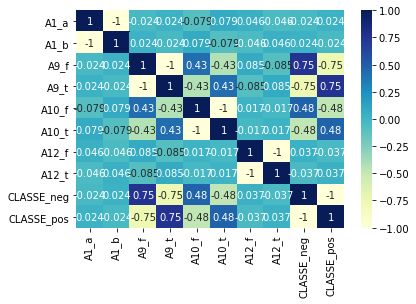

In [23]:
# Correlação das features categoricas binarizadas
sb.heatmap(data_encoded2.corr(method='spearman'), annot=True, cmap='YlGnBu')

<AxesSubplot:>

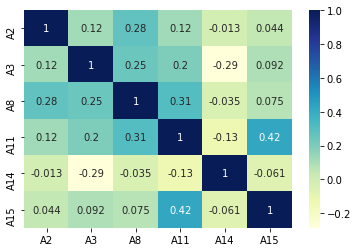

In [24]:
# Correlação das features numericas
sb.heatmap(df.corr(method='spearman'), annot=True, cmap='YlGnBu')

Nesse caso, nenhum atributo possui correlação acima de 95%, por isso não farei nenhuma remoção de atributos.

É importante essa etapa num desenvolvimento para diminuir a dimensionalidade do problema, um exemplo é tranformar os atributos de largura e altura em um atributo volume. 

## Etapa 14 Aplique PCA

In [25]:
scaler = StandardScaler()
df_padronizado = scaler.fit_transform(data_encoded2)

In [26]:
pca = PCA(n_components=0.5)
projected = pca.fit_transform(df_padronizado)

print("Componentes Principais")
print(pca.components_)

print("\n")
print("Variâncias")
print(pca.explained_variance_ratio_)

component_names = ['component {}'.format(i) for i in range(len(pca.components_))]

print("\n")
components_df = pd.DataFrame(data=pca.components_,index=component_names,columns=data_encoded2.columns)
components_df.head()

Componentes Principais
[[ 0.04092968 -0.04092968 -0.42822425  0.42822425 -0.34962871  0.34962871
  -0.05023197  0.05023197 -0.43610236  0.43610236]
 [ 0.50611573 -0.50611573  0.04770663 -0.04770663 -0.0859315   0.0859315
   0.48373076 -0.48373076  0.01383021 -0.01383021]]


Variâncias
[0.42532061 0.21091938]




,A1_a,A1_b,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,CLASSE_neg,CLASSE_pos
component 0,0.040930,-0.040930,-0.428224,0.428224,-0.349629,0.349629,-0.050232,0.050232,-0.436102,0.436102
component 1,0.506116,-0.506116,0.047707,-0.047707,-0.085931,0.085931,0.483731,-0.483731,0.013830,-0.013830


In [27]:
print(data_encoded2.loc[[0]])
print(df_padronizado[[0]])
print(projected[[0]])

   A1_a  A1_b  A9_f  A9_t  A10_f  A10_t  A12_f  A12_t  CLASSE_neg  CLASSE_pos
0   0.0   1.0   0.0   1.0    0.0    1.0    1.0    0.0         0.0         1.0
[[-0.65419118  0.65419118 -0.93951134  0.93951134 -1.15071192  1.15071192
   0.93392838 -0.93392838 -1.12327422  1.12327422]]
[[2.44163421 0.31839961]]


In [28]:
print(projected)

[[ 2.44163421  0.31839961]
 [ 2.62031651  2.5278947 ]
 [ 1.2079989   2.18077628]
 ...
 [-0.6507277   0.8353426 ]
 [-2.44312508  0.21817434]
 [-2.2417276  -1.72127092]]


## Etapa 15 Scatter Plot

<AxesSubplot:>

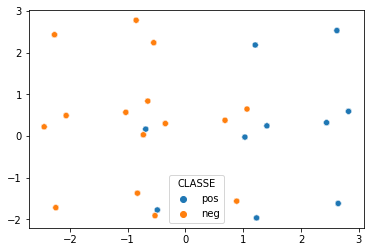

In [29]:
instancias_classes = df["CLASSE"]
sb.scatterplot(x=projected[:, 0], y=projected[:, 1], hue=instancias_classes)#dim1-pca, dim2-pca, classes

Pelo gráfico podemos perceber que a grande maioria das instancias classificadas como neg estão na parte negativa do eixo x, e os classificados como pos estão em maioria na parte positiva do eixo x

## Etapa 16 Discretização

In [62]:
df.head()

# Intervalos de quartis de cada atributo
bins = pd.qcut(df['A2'], 4)
print(bins.value_counts())
print("\n")
bins = pd.qcut(df['A3'], 4)
print(bins.value_counts())
print("\n")
bins = pd.qcut(df['A8'], 4)
print(bins.value_counts())
print("\n")
bins = pd.qcut(df['A11'], 4, duplicates='drop')
print(bins.value_counts())
print("\n")
bins = pd.qcut(df['A14'], 4)
print(bins.value_counts())
print("\n")
bins = pd.qcut(df['A15'], 4, duplicates='drop')
print(bins.value_counts())
print("\n")

(13.749, 22.67]    174
(37.75, 80.25]     168
(28.67, 37.75]     168
(22.67, 28.67]     164
Name: A2, dtype: int64


(1.04, 3.0]       183
(-0.001, 1.04]    172
(7.5, 28.0]       166
(3.0, 7.5]        153
Name: A3, dtype: int64


(0.165, 1.0]       178
(-0.001, 0.165]    172
(2.75, 28.5]       167
(1.0, 2.75]        157
Name: A8, dtype: int64


(-0.001, 3.0]    524
(3.0, 67.0]      150
Name: A11, dtype: int64


(73.5, 160.0]      193
(-0.001, 73.5]     169
(272.0, 2000.0]    168
(160.0, 272.0]     144
Name: A14, dtype: int64


(-0.001, 5.0]        340
(400.0, 100000.0]    167
(5.0, 400.0]         167
Name: A15, dtype: int64




In [63]:
disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
intervalos = {}
for key in num_keys[:-1]:
    intervalos[key] = disc.fit_transform(np.array(df[key]).reshape(-1, 1))

C:\Users\Fillipe Martins\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [64]:
# Distribuição final dos valores da discretização em 4 bins
print(intervalos.keys())

intervalos["A2"]

dict_keys(['A2', 'A3', 'A8', 'A11', 'A14'])


array([[2.],
       [3.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.],
       [3.],
       [3.],
       [0.],
       [2.],
       [3.],
       [3.],
       [3.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.],